<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---


In [2]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

2025-05-02 10:43:26.203222: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 10:43:28.808179: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-02 10:43:29.624400: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746182609.906139    1918 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746182609.959377    1918 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746182614.213648    1918 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

# Define start day to fetch the dataset from the yahoo finance library

---


In [3]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [4]:
data = load_data('TCS.NS')
df=data
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,289.872955,292.668909,288.870254,291.087735,1963682
1,2010-01-05,289.950043,292.919543,287.906109,291.164846,2014488
2,2010-01-06,283.394104,290.085127,282.680663,289.950136,3349176
3,2010-01-07,275.507721,285.148948,274.196505,283.644907,6474892
4,2010-01-08,269.877075,277.088714,268.604439,276.124592,6048178


In [5]:
print(df.columns)

MultiIndex([(  'Date',       ''),
            ( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])


In [6]:
print(df.head())

Price        Date       Close        High         Low        Open   Volume
Ticker                 TCS.NS      TCS.NS      TCS.NS      TCS.NS   TCS.NS
0      2010-01-04  289.872955  292.668909  288.870254  291.087735  1963682
1      2010-01-05  289.950043  292.919543  287.906109  291.164846  2014488
2      2010-01-06  283.394104  290.085127  282.680663  289.950136  3349176
3      2010-01-07  275.507721  285.148948  274.196505  283.644907  6474892
4      2010-01-08  269.877075  277.088714  268.604439  276.124592  6048178


In [7]:
df = df.drop([('Date', ''), ('Adj Close', 'TCS.NS')], axis=1, errors='ignore')

Visualizing Closing Price

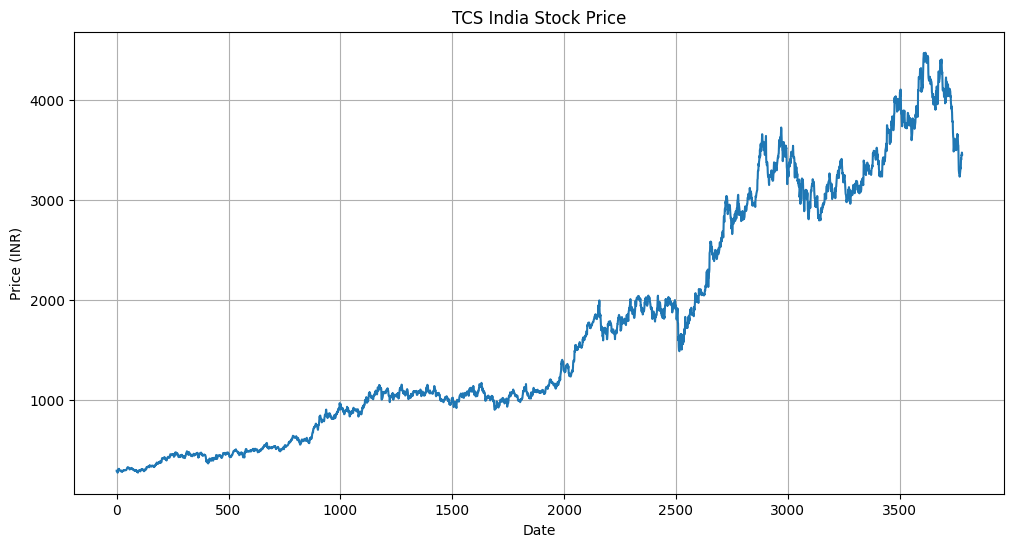

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [9]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,289.872955,292.668909,288.870254,291.087735,1963682
1,289.950043,292.919543,287.906109,291.164846,2014488
2,283.394104,290.085127,282.680663,289.950136,3349176
3,275.507721,285.148948,274.196505,283.644907,6474892
4,269.877075,277.088714,268.604439,276.124592,6048178
...,...,...,...,...,...
3776,3401.600098,3412.500000,3387.699951,3401.100098,2252175
3777,3448.000000,3477.800049,3405.000000,3420.000000,2742991
3778,3443.500000,3457.800049,3405.000000,3435.000000,1593296


# Plotting moving averages of 100 day

---


In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3776,3874.067993
3777,3866.765049
3778,3859.161675
3779,3851.791216


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

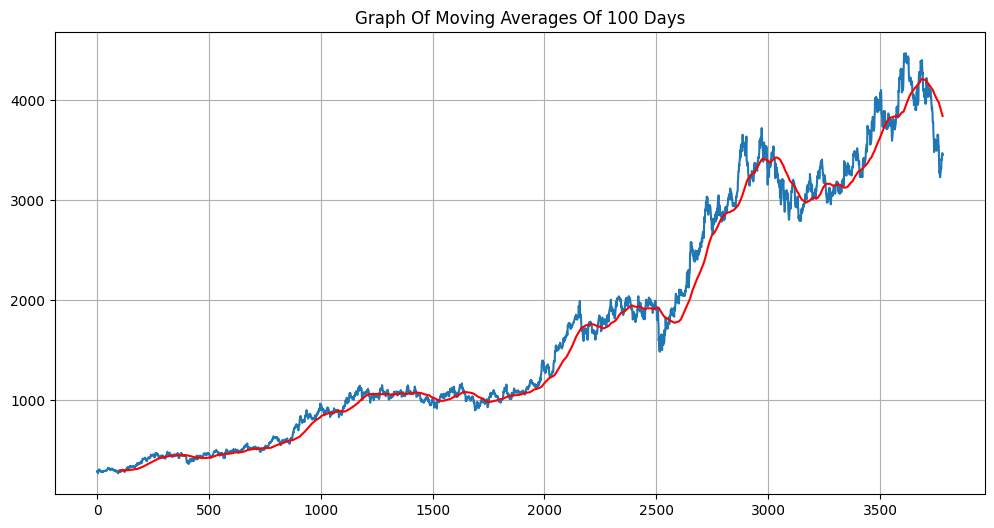

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---


In [12]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3776,4027.022461
3777,4024.567074
3778,4022.134005
3779,4019.937042


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

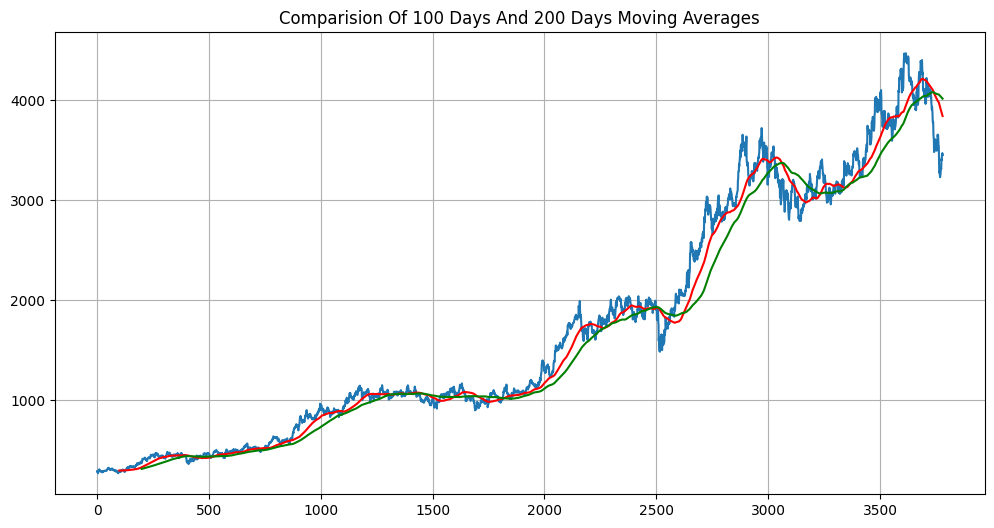

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [14]:
df.shape

(3781, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [15]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2646, 6)
(1135, 6)


In [16]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,289.872955,292.668909,288.870254,291.087735,1963682
1,2010-01-05,289.950043,292.919543,287.906109,291.164846,2014488
2,2010-01-06,283.394104,290.085127,282.680663,289.950136,3349176
3,2010-01-07,275.507721,285.148948,274.196505,283.644907,6474892
4,2010-01-08,269.877075,277.088714,268.604439,276.124592,6048178


In [17]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2646,2020-09-25,2210.299561,2226.450406,2146.243532,2160.751870,8228267
2647,2020-09-28,2213.948975,2230.099817,2158.926418,2226.449899,4347166
2648,2020-09-29,2270.613525,2291.281316,2213.948691,2221.750434,6995811
2649,2020-09-30,2274.172607,2285.761052,2244.699476,2271.161381,3917166
2650,2020-10-01,2302.596924,2317.698508,2274.173269,2290.324116,2610337


# Using MinMax scaler for normalization of the dataset

---


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [19]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [20]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.00970407],
       [0.00974227],
       [0.00914058],
       ...,
       [0.98870035],
       [1.        ],
       [0.97288091]])

In [21]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [22]:
x_train.shape

(2546, 100, 1)

# ML Model (LSTM)

---


In [23]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

2025-05-02 10:43:51.646406: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/workspaces/python/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---


In [26]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 216ms/step - loss: 0.0709 - mean_absolute_error: 0.1883
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 213ms/step - loss: 0.0078 - mean_absolute_error: 0.0603
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 222ms/step - loss: 0.0067 - mean_absolute_error: 0.0555
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - loss: 0.0055 - mean_absolute_error: 0.0513
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 221ms/step - loss: 0.0055 - mean_absolute_error: 0.0496
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 224ms/step - loss: 0.0043 - mean_absolute_error: 0.0446
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - loss: 0.0042 - mean_absolute_error: 0.0455
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - loss: 0.0048 - mean_absolute_error: 0.0456
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - loss: 0.0041 - mean_absolute_error: 0.0434
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 145ms/step - loss: 0.0033 - mean_absolute_error: 0.0385
Epoch 11/

In [27]:
model.save('keras_model.h5')

In [28]:
test_close.shape

(1135, 1)

In [29]:
past_100_days = pd.DataFrame(train_close[-100:])

In [30]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---

In [35]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [36]:
final_df.head()

,0
0,1733.838690
1,1760.254898
2,1732.930930
3,1755.080620
4,1810.091194


In [37]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00229762],
       [0.0118488 ],
       [0.00196941],
       ...,
       [0.61737831],
       [0.62460961],
       [0.63075622]])

In [38]:
input_data.shape

(1235, 1)

# Testing the model

---


In [39]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1135, 100, 1)
(1135,)


# Making prediction and plotting the graph of predicted vs actual values

---


In [41]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step


In [42]:
y_pred.shape

(1135, 1)

In [43]:
y_test

array([0.15665456, 0.18040868, 0.17870952, ..., 0.61737831, 0.62460961,
       0.63075622])

In [44]:
y_pred

array([[0.22145136],
       [0.22606647],
       [0.23017967],
       ...,
       [0.6280191 ],
       [0.64447105],
       [0.65709376]], dtype=float32)

In [45]:
scaler.scale_

array([0.00036157])

In [46]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

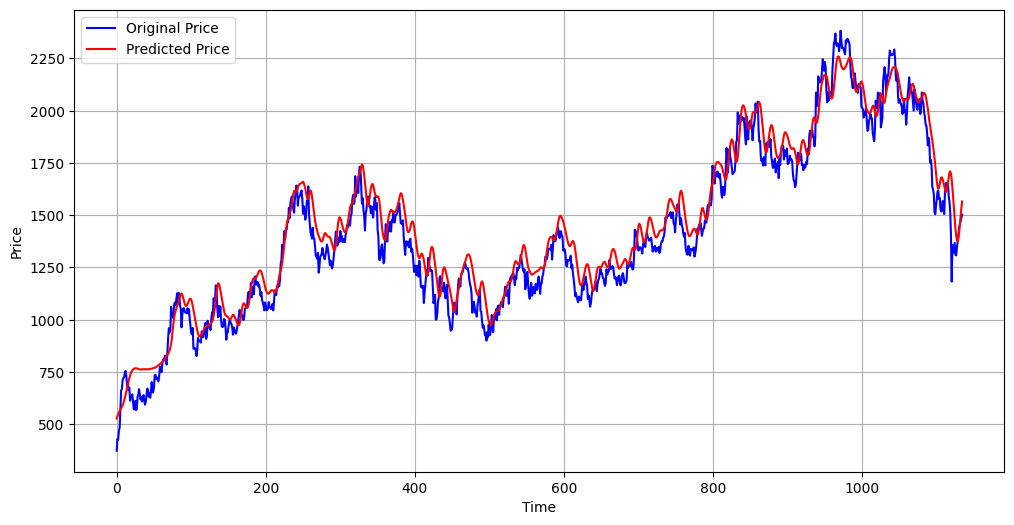

In [47]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [48]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.41%


Calculation of R2 score

In [49]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9460000309947658


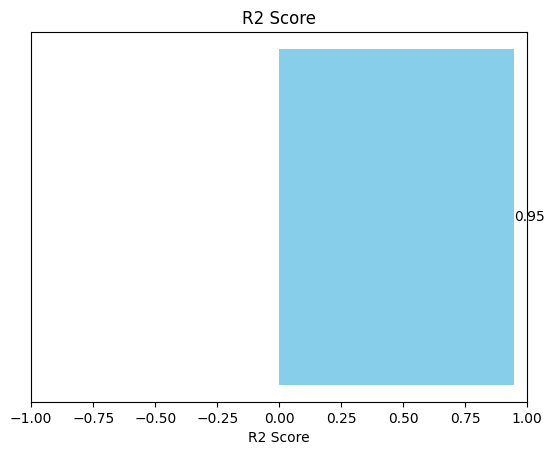

In [50]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

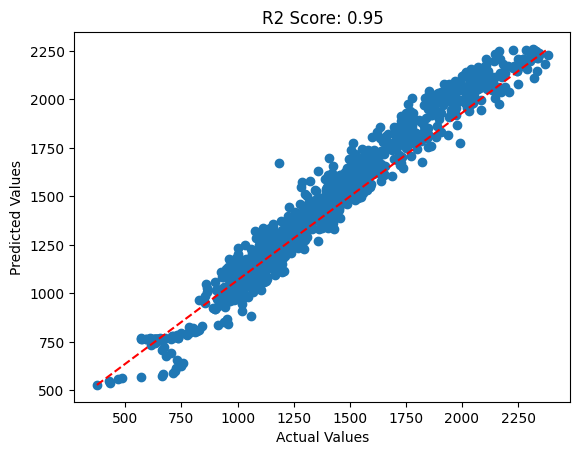

In [51]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()